# SPLASH catalog of SXDS LAE
Here is the description of this catalog written by Vihang:
We compute photometry for [these] sources using data taken as part of the SPLASH project, which include 9 broadband filters: u (CFHT), b,v,r,i,z (Subaru), J,H,K (UKIRT). Source detection is done via SExtractor using a bizJHK chi^2 combined image and all filters are PSF matched to the K-band PSF for measuring photometry. Sources are matched to within 0.5".

Photometric redshifts are computed using the Le Phare code (www.oamp.fr/people/arnouts/LE_PHARE.html), which is based on a chi^2 template fitting procedure. We use 1" aperture fluxes for computing the photo-z, as fixed-aperture photometry is expected to be less noisy for faint sources. We choose the 1" aperture in order to maximize the signal-to-noise for the PSF of our images. We use the COSMOS templates with Calzetti (starburst) and Prevot (SMC) dust attenuation laws allowing for $0<E(B-V)<0.5$ for deriving the photo-z. Moreover, we utilize the available spectroscopic redshift information in the region to further improve our redshift accuracy by allowing for per-filter systematic magnitude offsets.

While aperture photometry is optimal for colors and deriving the photo-z, total fluxes are necessary for obtaining the physical parameters for galaxies. Using the auto magnitudes from our photometry and derived photo-z, we compute the physical parameters for the sources using Le Phare. We use Bruzual & Charlot (2003) GALAXEV templates with solar (Z=0.02) and sub-solar (Z=0.008) metallicities, exponentially declining star formation histories with timescales of 0.1,0.3,1,5,15 Gyr, and a Chabrier IMF. We apply the Calzetti dust attenuation law allowing for $0<E(B-V)<1.2$.

P.S.: For the 215 sources, the physical parameters have been derived by fixing the photo-z to 3.34.


In [1]:
#from graphlab import SFrame
import sframe 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#import graphlab
#graphlab.canvas.set_target('ipynb')


[INFO] Start server at: ipc:///tmp/graphlab_server-22433-1461808447 - Server binary: /Users/Mehdi/anaconda/lib/python2.7/site-packages/sframe/unity_server - Server log: /tmp/sframe_server_1461808447.log
[INFO] GraphLab Server Version: 1.8


In [2]:
spsh=sframe.SFrame.read_csv('matched_215_zphot.out',delimiter='  ',skip_initial_space=True,skiprows=0,header=True)
splash=np.loadtxt('matched_215_zphot.out')
ID=np.int_(splash[:,0])
specz=splash[:,1]
photz=splash[:,2]
chi_photz=splash[:,3]
ebv=splash[:,4]
age=splash[:,5]    
mass=splash[:,6]                 
sfr=splash[:,7]                
ssfr=splash[:,8]                
lnuv=splash[:,9]            
chi_phys=splash[:,10]
good=np.where(age >= 0)
logage=np.log10(age[good])


PROGRESS: Finished parsing file /Users/Mehdi/Dropbox/Research/SPLASH-Vihang/lephare_mehdi/matched_215_zphot.out
PROGRESS: Parsing completed. Parsed 100 lines in 0.023615 secs.
------------------------------------------------------
Inferred types from first line of file as 
column_type_hints=[int,float,float,float,float,float,float,float,float,float,float]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------
PROGRESS: Finished parsing file /Users/Mehdi/Dropbox/Research/SPLASH-Vihang/lephare_mehdi/matched_215_zphot.out
PROGRESS: Parsing completed. Parsed 215 lines in 0.009428 secs.


In [ ]:
#spsh

In [ ]:
#spsh['photz'].show(view='Numeric')

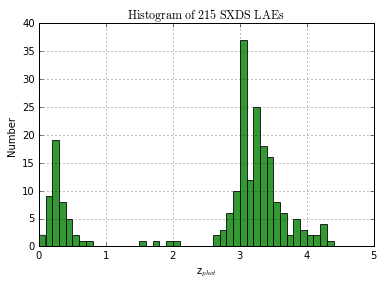

In [4]:
n, bins, patches = plt.hist(photz[good], bins=50, range=[0,5], normed=0, facecolor='green', alpha=0.8)
plt.xlabel('z$_{phot}$')
plt.ylabel('Number')
plt.title(r'$\mathrm{Histogram\ of\ 215\ SXDS\ LAEs }$')
plt.axis([0, 5, 0, 40])
plt.grid(True)
plt.show()

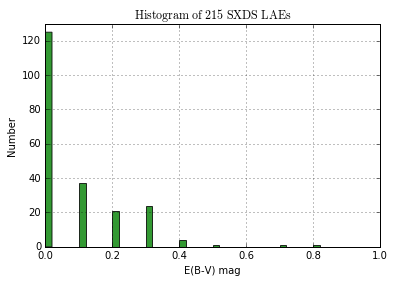

0.0


In [5]:
n, bins, patches = plt.hist(ebv[good], bins=50, range=[0,1], normed=0, facecolor='green', alpha=0.8)
plt.xlabel('E(B-V) mag')
plt.ylabel('Number')
plt.title(r'$\mathrm{Histogram\ of\ 215\ SXDS\ LAEs }$')
plt.axis([0, 1, 0, 130])
plt.grid(True)
plt.show()
print np.median(ebv[good])

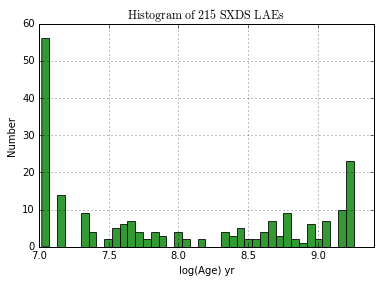

0.0560342752251


In [6]:
logage=np.log10(age[good])
n, bins, patches = plt.hist(logage, bins=40, normed=0, facecolor='green', alpha=0.8)
plt.xlabel('log(Age) yr')
plt.ylabel('Number')
plt.title(r'$\mathrm{Histogram\ of\ 215\ SXDS\ LAEs }$')
plt.axis([7, 9.4, 0, 60])
plt.grid(True)
plt.show()
print 10.0**np.median(logage)/1e9

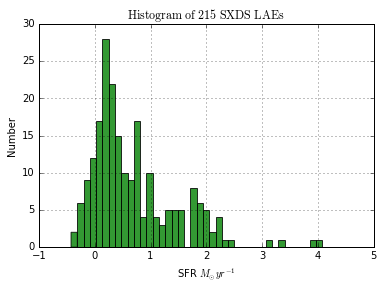

In [7]:
n, bins, patches = plt.hist(sfr[good], bins=40, normed=0, facecolor='green', alpha=0.8)
plt.xlabel('SFR $M_{\odot}yr^{-1}$')
plt.ylabel('Number')
plt.title(r'$\mathrm{Histogram\ of\ 215\ SXDS\ LAEs }$')
#plt.axis([7, 9.4, 0, 60])
plt.grid(True)
plt.show()


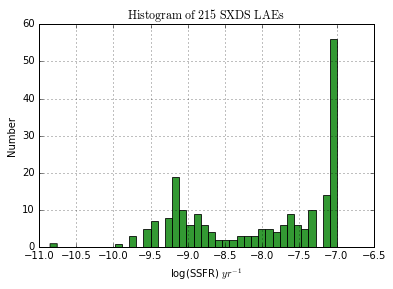

In [8]:
n, bins, patches = plt.hist(ssfr[good], bins=40, normed=0, facecolor='green', alpha=0.8)
plt.xlabel('log(SSFR) $yr^{-1}$')
plt.ylabel('Number')
plt.title(r'$\mathrm{Histogram\ of\ 215\ SXDS\ LAEs }$')
#plt.axis([7, 9.4, 0, 60])
plt.grid(True)
plt.show()

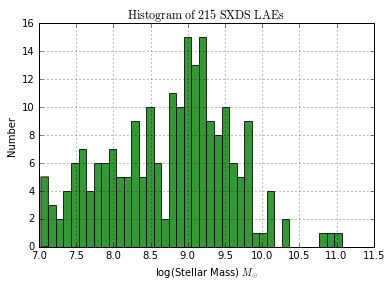

In [9]:
n, bins, patches = plt.hist(mass[good], bins=40, normed=0, facecolor='green', alpha=0.8)
plt.xlabel('log(Stellar Mass) $M_{\odot}$')
plt.ylabel('Number')
plt.title(r'$\mathrm{Histogram\ of\ 215\ SXDS\ LAEs }$')
#plt.axis([7, 9.4, 0, 60])
plt.grid(True)
plt.show()

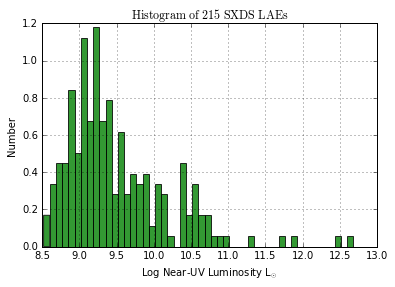

In [10]:
n, bins, patches = plt.hist(lnuv[good], bins=50, normed=1, facecolor='green', alpha=0.8)
plt.xlabel('Log Near-UV Luminosity L$_{\odot}$')
plt.ylabel('Number')
plt.title(r'$\mathrm{Histogram\ of\ 215\ SXDS\ LAEs }$')
#plt.axis([7, 9.4, 0, 60])
plt.grid(True)
plt.show()

## Manually entering data for Mostardi 2015  Figure 15 but the wrong sample! 

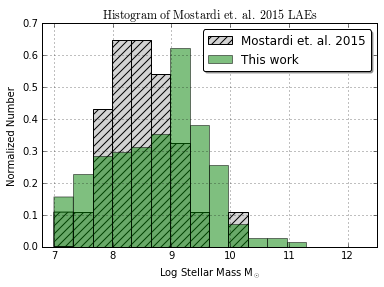

0.316227766017
8.5
8.90398
0.801641145599


In [23]:
#Gray shade data
bin_mos=0.33*np.arange(15)+7.0
logmass_mos=np.array([7.25,7.5,7.85,7.85,7.85,7.85,8.25,8.25,8.25,8.25,8.25,8.25,8.5,8.5,8.5,8.5,8.5,8.5,8.85,8.85,8.85,8.85,8.85,9.25,9.25,9.25,9.5,10.25])
fig1=nmos, bin, patches = plt.hist(logmass_mos, bins=bin_mos, normed=1, facecolor='lightgray', alpha=1.0,hatch='///',label='Mostardi et. al. 2015')
fig1=n, bins, patches = plt.hist(mass[good], bins=bin_mos, normed=1, facecolor='green', alpha=0.5,label='This work')
plt.xlabel('Log Stellar Mass M$_{\odot}$')
plt.ylabel('Normalized Number')
plt.title(r'$\mathrm{Histogram\ of\ Mostardi\ et.\ al.\ 2015\ LAEs }$')
plt.axis([6.8, 12.5, 0, 0.7])
plt.grid(True)
plt.legend(loc='upper right',bbox_to_anchor=[1,1],ncol=1,shadow=True,fancybox=True)
plt.show()
print 10**np.median(logmass_mos)/1e9
print np.median(logmass_mos)
print np.median(mass[good])
print 10**np.median(mass[good])/1e9


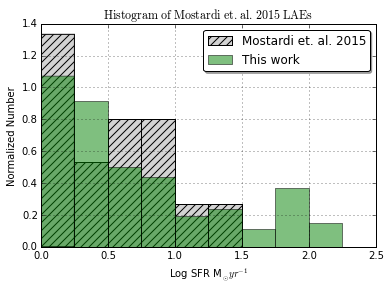

2.73320999366


In [17]:
#Gray shade data
bin_mos=0.25*np.arange(10)
logsfr_mos=np.array([0.17,0.17,0.17,0.17,0.17,0.37,0.37,0.7,0.7,0.7,0.8,0.8,0.8,1.2,1.4])
fig2=nmos, bin, patches = plt.hist(logsfr_mos, bins=bin_mos, normed=1, facecolor='lightgray', alpha=1.0,hatch='///',label='Mostardi et. al. 2015')
fig2=n, bins, patches = plt.hist(sfr[good], bins=bin_mos, normed=1, facecolor='green', alpha=0.5,label='This work')
plt.xlabel('Log SFR M$_{\odot}yr^{-1}$')
plt.ylabel('Normalized Number')
plt.title(r'$\mathrm{Histogram\ of\ Mostardi\ et.\ al.\ 2015\ LAEs }$')
#plt.axis([0, 2.5, 0, 0.7])
plt.grid(True)
plt.legend(loc='upper right',bbox_to_anchor=[1,1],ncol=1,shadow=True,fancybox=True)
plt.show()
print 10**np.median(sfr[good])

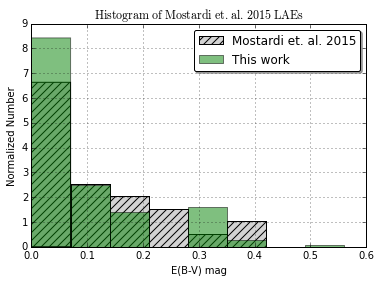

In [233]:
#Gray shade data
bin_mos=0.07*np.arange(10)
logebv_mos=np.array([0.05,  0.05,  0.05,  0.05,  0.05,  0.05,  0.05,  0.05,  0.05,
        0.05,  0.05,  0.05,  0.05,0.1,  0.1,  0.1,  0.1,  0.1,0.17,  0.17,  0.17,  0.17,0.25,  0.25,  0.25,0.33,0.4,0.4])
fig3=nmos, bin, patches = plt.hist(logebv_mos, bins=bin_mos, normed=1, facecolor='lightgray', alpha=1.0,hatch='///',label='Mostardi et. al. 2015')
fig3=n, bins, patches = plt.hist(ebv[good], bins=bin_mos, normed=1, facecolor='green', alpha=0.5,label='This work')
plt.xlabel('E(B-V) mag')
plt.ylabel('Normalized Number')
plt.title(r'$\mathrm{Histogram\ of\ Mostardi\ et.\ al.\ 2015\ LAEs }$')
plt.axis([0, 0.6, 0, 9])
plt.grid(True)
plt.legend(loc='upper right',bbox_to_anchor=[1,1],ncol=1,shadow=True,fancybox=True)
plt.show()

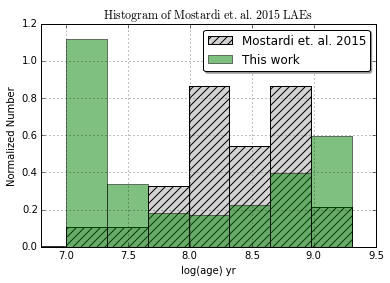

0.316227766017
0.0560342752251
0.542056074766
0.178571428571


In [347]:
idz=np.where(photz[good] >= 2.5 )
logage2=logage[idz]
#Gray shade data
bin_mos=0.33*np.arange(10)+6.67
logage_mos=np.array([7.2,7.4,7.7,7.7,7.7,8.2,8.2,8.2,8.2,8.2,8.2,8.2,8.2,8.5,8.5,8.5,8.5,8.5,8.8,8.8,8.8,8.8,8.8,8.8,8.8,8.8,9.2,9.2])
fig3=nmos, bin, patches = plt.hist(logage_mos, bins=bin_mos, normed=True, facecolor='lightgray', alpha=1.0,hatch='///',label='Mostardi et. al. 2015')
fig3=n, bins, patches = plt.hist(logage, bins=bin_mos, normed=True, facecolor='green', alpha=0.5,label='This work')
#fig3=n, bins, patches = plt.hist(logage2, bins=bin_mos, normed=True, facecolor='red', alpha=0.5,label='z>2.5')

plt.xlabel('log(age) yr')
plt.ylabel('Normalized Number')
plt.title(r'$\mathrm{Histogram\ of\ Mostardi\ et.\ al.\ 2015\ LAEs }$')
plt.axis([6.8, 9.5, 0, 1.2])
plt.grid(True)
plt.legend(loc='upper right',bbox_to_anchor=[1,1],ncol=1,shadow=True,fancybox=True)
plt.show()
print 10**np.median(logage_mos)/1e9
print 10**np.median(logage)/1e9
print len(np.where(logage <= 8)[0])/float(len(logage))
print len(np.where(logage_mos <= 8)[0])/float(len(logage_mos))


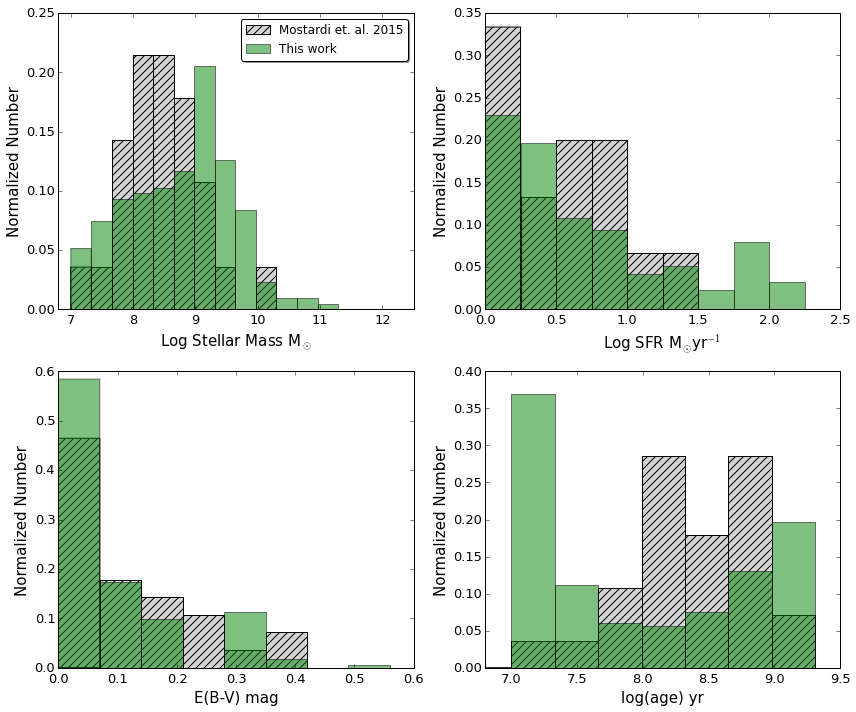

In [330]:
fig, plt.subplots(2,2,dpi=75,tight_layout=True,figsize=(12,10))

#Stellar mass
plt.subplot(2,2,1)
bin_mos=0.33*np.arange(15)+7.0
logmass_mos=np.array([7.25,7.5,7.85,7.85,7.85,7.85,8.25,8.25,8.25,8.25,8.25,8.25,8.5,8.5,8.5,8.5,8.5,8.5,8.85,8.85,8.85,8.85,8.85,9.25,9.25,9.25,9.5,10.25])
weights = np.ones_like(logmass_mos)/float(len(logmass_mos))
weights2 = np.ones_like(mass[good])/float(len(mass[good]))
plt.hist(logmass_mos, bins=bin_mos, weights=weights,normed=0, facecolor='lightgray', alpha=1.0,hatch='///',label='Mostardi et. al. 2015')
plt.hist(mass[good], bins=bin_mos, weights=weights2,normed=0, facecolor='green', alpha=0.5,label='This work')
plt.xlabel('Log Stellar Mass M$_{\odot}$',fontsize=15)
plt.ylabel('Normalized Number',fontsize=15)
#plt.title(r'$\mathrm{Histogram\ of\ Mostardi\ et.\ al.\ 2015\ LAEs }$',fontsize=15)
plt.axis([6.8, 12.5, 0, 0.25])
plt.grid(False)
plt.tick_params(axis='both', which='major', labelsize=13)
plt.legend(loc='upper right',bbox_to_anchor=[1,1],ncol=1,shadow=True,fancybox=True)

#SFR plot
plt.subplot(2,2,2)
bin_mos=0.25*np.arange(10)
logsfr_mos=np.array([0.17,0.17,0.17,0.17,0.17,0.37,0.37,0.7,0.7,0.7,0.8,0.8,0.8,1.2,1.4])
weights = np.ones_like(logsfr_mos)/float(len(logsfr_mos))
weights2 = np.ones_like(sfr[good])/float(len(sfr[good]))
plt.hist(logsfr_mos, bins=bin_mos,weights=weights, normed=0, facecolor='lightgray', alpha=1.0,hatch='///',label='Mostardi et. al. 2015')
plt.hist(sfr[good], bins=bin_mos, weights=weights2,normed=0, facecolor='green', alpha=0.5,label='This work')
plt.xlabel('Log SFR M$_{\odot}$yr$^{-1}$',fontsize=15)
plt.ylabel('Normalized Number',fontsize=15)
#plt.title(r'$\mathrm{Histogram\ of\ Mostardi\ et.\ al.\ 2015\ LAEs }$',fontsize=15)
#plt.axis([0, 2.5, 0, 0.7])
plt.grid(False)
plt.tick_params(axis='both', which='major', labelsize=13)
#plt.legend(loc='upper right',bbox_to_anchor=[1,1],ncol=1,shadow=True,fancybox=True)

plt.subplot(2,2,3)
# E(B-V) plot
bin_mos=0.07*np.arange(10)
logebv_mos=np.array([0.05,  0.05,  0.05,  0.05,  0.05,  0.05,  0.05,  0.05,  0.05,
        0.05,  0.05,  0.05,  0.05,0.1,  0.1,  0.1,  0.1,  0.1,0.17,  0.17,  0.17,  0.17,0.25,  0.25,  0.25,0.33,0.4,0.4])
weights = np.ones_like(logebv_mos)/float(len(logebv_mos))
weights2 = np.ones_like(ebv[good])/float(len(ebv[good]))
plt.hist(logebv_mos, bins=bin_mos, weights=weights,normed=0, facecolor='lightgray', alpha=1.0,hatch='///',label='Mostardi et. al. 2015')
plt.hist(ebv[good], bins=bin_mos, weights=weights2,normed=0, facecolor='green', alpha=0.5,label='This work')
plt.xlabel('E(B-V) mag',fontsize=15)
plt.ylabel('Normalized Number',fontsize=15)
#plt.title(r'$\mathrm{Histogram\ of\ Mostardi\ et.\ al.\ 2015\ LAEs }$',fontsize=15)
plt.axis([0, 0.6, 0, 0.6])
plt.tick_params(axis='both', which='major', labelsize=13)
plt.grid(False)
#plt.legend(loc='upper right',bbox_to_anchor=[1,1],ncol=1,shadow=True,fancybox=True)
#plt.show()

#Making the age plot
plt.subplot(2,2,4)
bin_mos=0.33*np.arange(10)+6.67
logage_mos=np.array([7.2,7.4,7.7,7.7,7.7,8.2,8.2,8.2,8.2,8.2,8.2,8.2,8.2,8.5,8.5,8.5,8.5,8.5,8.8,8.8,8.8,8.8,8.8,8.8,8.8,8.8,9.2,9.2])
weights = np.ones_like(logage_mos)/float(len(logage_mos))
weights2 = np.ones_like(logage)/float(len(logage))
plt.hist(logage_mos, bins=bin_mos, weights=weights,normed=0, facecolor='lightgray', alpha=1.0,hatch='///',label='Mostardi et. al. 2015')
plt.hist(logage, bins=bin_mos, weights=weights2,normed=0, facecolor='green', alpha=0.5,label='This work')
plt.xlabel('log(age) yr',fontsize=15)
plt.ylabel('Normalized Number',fontsize=15)
#plt.title(r'$\mathrm{Histogram\ of\ Mostardi\ et.\ al.\ 2015\ LAEs }$',fontsize=15)
plt.axis([6.8, 9.5, 0, 0.4])
plt.grid(False)
plt.tick_params(axis='both', which='major', labelsize=13)
#plt.legend(loc='upper right',bbox_to_anchor=[1,1],ncol=1,shadow=True,fancybox=True)
plt.savefig('mostardi.png')


# The correct sample of Mostardi 2015

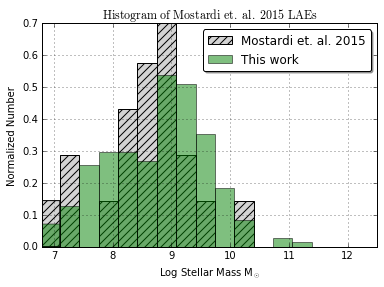

0.316227766017
8.5
8.90398
0.801641145599


In [22]:
#Dashed shade data
bin_mos2=0.33*np.arange(15)+6.77
logmass_mos2=np.array([6.8,7.2,7.2,7.85,8.2,8.2,8.2,8.5,8.5,8.5,8.5,8.9,8.9,8.9,8.9,8.9,8.9,9.2,9.2,9.5,10.2])
fig1=nmos2, bin, patches = plt.hist(logmass_mos2, bins=bin_mos2, normed=1, facecolor='lightgray', alpha=1.0,hatch='///',label='Mostardi et. al. 2015')
fig1=n, bins, patches = plt.hist(mass[good], bins=bin_mos2, normed=1, facecolor='green', alpha=0.5,label='This work')
plt.xlabel('Log Stellar Mass M$_{\odot}$')
plt.ylabel('Normalized Number')
plt.title(r'$\mathrm{Histogram\ of\ Mostardi\ et.\ al.\ 2015\ LAEs }$')
plt.axis([6.8, 12.5, 0, 0.7])
plt.grid(True)
plt.legend(loc='upper right',bbox_to_anchor=[1,1],ncol=1,shadow=True,fancybox=True)
plt.show()
print 10**np.median(logmass_mos2)/1e9
print np.median(logmass_mos2)
print np.median(mass[good])
print 10**np.median(mass[good])/1e9

# I got the data from Robin Mostardi 2015 Fig 15 gray-hashed region

In [3]:
robin=sframe.SFrame.read_csv('LAE_GroundBasedStellarPop_Mostardi2015_Fig15.txt',delimiter=' ')
robin

PROGRESS: Finished parsing file /Users/Mehdi/Dropbox/Research/SPLASH-Vihang/lephare_mehdi/LAE_GroundBasedStellarPop_Mostardi2015_Fig15.txt
PROGRESS: Parsing completed. Parsed 21 lines in 0.009034 secs.
------------------------------------------------------
Inferred types from first line of file as 
column_type_hints=[float,float,float,float]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------
PROGRESS: Finished parsing file /Users/Mehdi/Dropbox/Research/SPLASH-Vihang/lephare_mehdi/LAE_GroundBasedStellarPop_Mostardi2015_Fig15.txt
PROGRESS: Parsing completed. Parsed 21 lines in 0.008827 secs.


Log(Stellar_Mass[M_Sun]),Log(SFR[M_sun/yr]),E(B-V),Log(Age[yr])
8.84,0.08,0.0,8.9
7.02,0.02,0.0,7.0
10.1,1.05,0.370563,9.2
8.3,-0.27,0.0,8.7
8.35,0.07,0.123521,8.1
7.26,0.28,0.247042,7.0
8.58,-0.26,0.0,8.5
9.25,1.3,0.296451,8.0
8.34,-0.31,0.0,8.8
8.78,0.93,0.197634,7.8


In [4]:
logmass=robin['Log(Stellar_Mass[M_Sun])'].to_numpy()
logsfr=robin['Log(SFR[M_sun/yr])'].to_numpy()
ebvmos=robin['E(B-V)'].to_numpy()
logagemos=robin['Log(Age[yr])'].to_numpy()


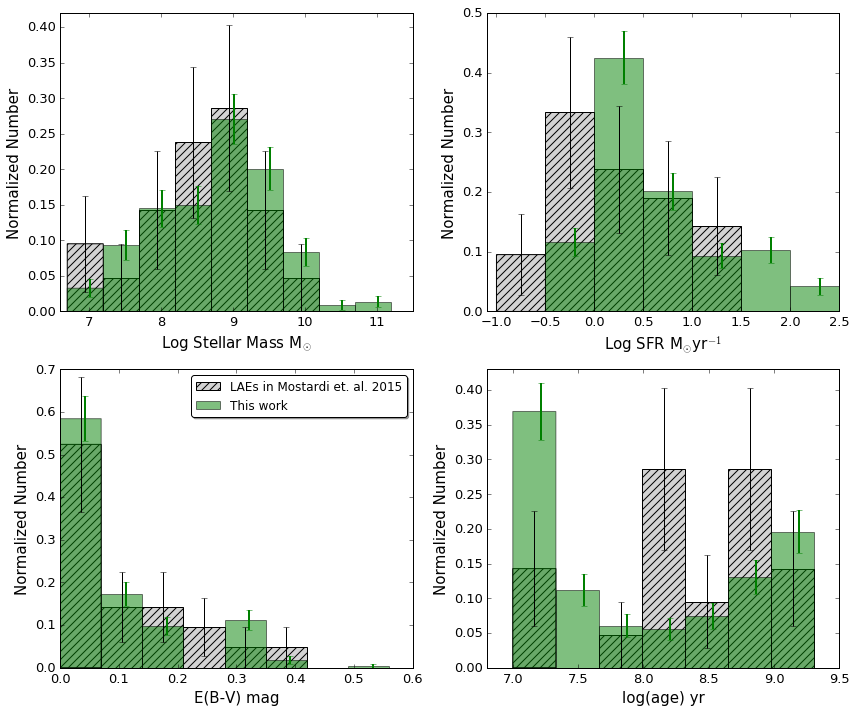

In [68]:

fig=plt.subplots(2,2,dpi=75,tight_layout=True,figsize=(12,10))

#Stellar mass
plt.subplot(2,2,1)
#bin_mos=0.5*0.33*np.arange(30)+6.67
bin_mos=np.arange(6.7,13.7,0.5)
#logmass_mos=np.array([7.25,7.5,7.85,7.85,7.85,7.85,8.25,8.25,8.25,8.25,8.25,8.25,8.5,8.5,8.5,8.5,8.5,8.5,8.85,8.85,8.85,8.85,8.85,9.25,9.25,9.25,9.5,10.25])
weights = np.ones_like(logmass)/float(len(logmass))
weights2 = np.ones_like(mass[good])/float(len(mass[good]))

n, bins, patches=plt.hist(logmass, bins=bin_mos, weights=weights,normed=0, facecolor='lightgray', alpha=1.0,hatch='///',label='LAEs in Mostardi et. al. 2015')
yerror=np.sqrt(n)*np.sqrt(weights[0])
x0=np.arange(6.95,13.45,0.5)
plt.errorbar(x0, n, yerr=yerror, fmt=' ',ecolor='black')

n2, bins2, patches2=plt.hist(mass[good], bins=bin_mos, weights=weights2,normed=0, facecolor='green', alpha=0.5,label='This work')
yerror2=np.sqrt(n2)*np.sqrt(weights2[0])
x02=np.arange(7.02,13.51,0.5)
plt.errorbar(x02, n2, yerr=yerror2, fmt=' ',ecolor='green',elinewidth=2)

plt.xlabel('Log Stellar Mass M$_{\odot}$',fontsize=15)
plt.ylabel('Normalized Number',fontsize=15)
#plt.title(r'$\mathrm{Histogram\ of\ Mostardi\ et.\ al.\ 2015\ LAEs }$',fontsize=15)
plt.axis([6.6, 11.5, 0, 0.42])
plt.grid(False)
plt.tick_params(axis='both', which='major', labelsize=13)
#plt.legend(loc='upper right',bbox_to_anchor=[1,1],ncol=1,shadow=True,fancybox=True)

#SFR plot
plt.subplot(2,2,2)
bin_mos=np.arange(-1,3,0.5)
#logsfr_mos=np.array([0.17,0.17,0.17,0.17,0.17,0.37,0.37,0.7,0.7,0.7,0.8,0.8,0.8,1.2,1.4])
weights = np.ones_like(logsfr)/float(len(logsfr))
weights2 = np.ones_like(sfr[good])/float(len(sfr[good]))
n, bins, patches=plt.hist(logsfr, bins=bin_mos,weights=weights, normed=0, facecolor='lightgray', alpha=1.0,hatch='///',label='Mostardi et. al. 2015')
yerror=np.sqrt(n)*np.sqrt(weights[0])
x0=np.arange(-0.75,2.75,0.5)
plt.errorbar(x0, n, yerr=yerror, fmt=' ',ecolor='black')

n2, bins2, patches2=plt.hist(sfr[good], bins=bin_mos, weights=weights2,normed=0, facecolor='green', alpha=0.5,label='This work')
yerror2=np.sqrt(n2)*np.sqrt(weights2[0])
x02=np.arange(-0.7,2.8,0.5)
plt.errorbar(x02, n2, yerr=yerror2, fmt=' ',ecolor='green',elinewidth=2)

plt.xlabel('Log SFR M$_{\odot}$yr$^{-1}$',fontsize=15)
plt.ylabel('Normalized Number',fontsize=15)
#plt.title(r'$\mathrm{Histogram\ of\ Mostardi\ et.\ al.\ 2015\ LAEs }$',fontsize=15)
plt.axis([-1.1, 2.5, 0, 0.5])
plt.grid(False)
plt.tick_params(axis='both', which='major', labelsize=13)
#plt.legend(loc='upper right',bbox_to_anchor=[1,1],ncol=1,shadow=True,fancybox=True)

plt.subplot(2,2,3)
# E(B-V) plot
bin_mos=np.arange(0,0.6,0.07)
#logebv_mos=np.array([0.05,  0.05,  0.05,  0.05,  0.05,  0.05,  0.05,  0.05,  0.05,0.05,  0.05,  0.05,  0.05,0.1,  0.1,  0.1,  0.1,  0.1,0.17,  0.17,  0.17,  0.17,0.25,  0.25,  0.25,0.33,0.4,0.4])
weights = np.ones_like(ebvmos)/float(len(ebvmos))
weights2 = np.ones_like(ebv[good])/float(len(ebv[good]))
n, bins, patches=plt.hist(ebvmos, bins=bin_mos, weights=weights,normed=0, facecolor='lightgray', alpha=1.0,hatch='///',label='LAEs in Mostardi et. al. 2015')
yerror=np.sqrt(n)*np.sqrt(weights[0])
x0=np.arange(0.035,0.566,0.07)
plt.errorbar(x0, n, yerr=yerror, fmt=' ',ecolor='black')

n2, bins2, patches2=plt.hist(ebv[good], bins=bin_mos, weights=weights2,normed=0, facecolor='green', alpha=0.5,label='This work')
yerror2=np.sqrt(n2)*np.sqrt(weights2[0])
x02=np.arange(0.042,0.573,0.07)
plt.errorbar(x02, n2, yerr=yerror2, fmt=' ',ecolor='green',elinewidth=2)

plt.xlabel('E(B-V) mag',fontsize=15)
plt.ylabel('Normalized Number',fontsize=15)
#plt.title(r'$\mathrm{Histogram\ of\ Mostardi\ et.\ al.\ 2015\ LAEs }$',fontsize=15)
plt.axis([0, 0.6, 0, 0.7])
plt.tick_params(axis='both', which='major', labelsize=13)
plt.grid(False)
plt.legend(loc='upper right',bbox_to_anchor=[1,1],ncol=1,shadow=True,fancybox=True)
#plt.show()

#Making the age plot
plt.subplot(2,2,4)
#bin_mos=0.5*0.33*np.arange(20)+6.67
bin_mos=np.arange(7,9.33,0.33)
#logage_mos=np.array([7.2,7.4,7.7,7.7,7.7,8.2,8.2,8.2,8.2,8.2,8.2,8.2,8.2,8.5,8.5,8.5,8.5,8.5,8.8,8.8,8.8,8.8,8.8,8.8,8.8,8.8,9.2,9.2])
weights = np.ones_like(logagemos)/float(len(logagemos))
weights2 = np.ones_like(logage)/float(len(logage))
n, bins, patches=plt.hist(logagemos, bins=bin_mos, weights=weights,normed=0, facecolor='lightgray', alpha=1.0,hatch='///',label='Mostardi et. al. 2015')
yerror=np.sqrt(n)*np.sqrt(weights[0])
x0=np.arange(7.165,9.166,0.33)
plt.errorbar(x0, n, yerr=yerror, fmt=' ',ecolor='black')

n2, bins2, patches2=plt.hist(logage, bins=bin_mos, weights=weights2,normed=0, facecolor='green', alpha=0.5,label='This work')
yerror2=np.sqrt(n2)*np.sqrt(weights2[0])
x02=np.arange(7.215,9.216,0.33)
plt.errorbar(x02, n2, yerr=yerror2, fmt=' ',ecolor='green',elinewidth=2)

plt.xlabel('log(age) yr',fontsize=15)
plt.ylabel('Normalized Number',fontsize=15)
#plt.title(r'$\mathrm{Histogram\ of\ Mostardi\ et.\ al.\ 2015\ LAEs }$',fontsize=15)
plt.axis([6.8, 9.5, 0, 0.43])
plt.grid(False)
plt.tick_params(axis='both', which='major', labelsize=13)
#plt.legend(loc='upper right',bbox_to_anchor=[1,1],ncol=1,shadow=True,fancybox=True)
plt.savefig('mostardi.png')


In [69]:
print 'LAEs Mostardi median mass', 10**np.median(logmass)/1e9
print 'This work median Mass', 10**np.median(mass[good])/1e9

print 'LAEs Mostardi median SFR', 10**np.median(logsfr)
print 'This work median SFR', 10**np.median(sfr[good])

print 'This work median logSFR', np.median(sfr[good])
print 'LAEs Mostardi median logSFR', np.median(logsfr)
print 'LAEs Mostardi median E(B-V)', np.median(ebvmos)
print 'This work median E(B-V)', np.median(ebv[good])

print 'LAEs Mostardi median age', 10**np.median(logagemos)/1e9
print 'This work median age', 10**np.median(logage)/1e9

LAEs Mostardi median mass 0.398107170553
This work median Mass 0.801641145599
LAEs Mostardi median SFR 1.04712854805
This work median SFR 2.73320999366
This work median logSFR 0.436673
LAEs Mostardi median logSFR 0.02
LAEs Mostardi median E(B-V) 0.0247042
This work median E(B-V) 0.0
LAEs Mostardi median age 0.316227766017
This work median age 0.0560342752251


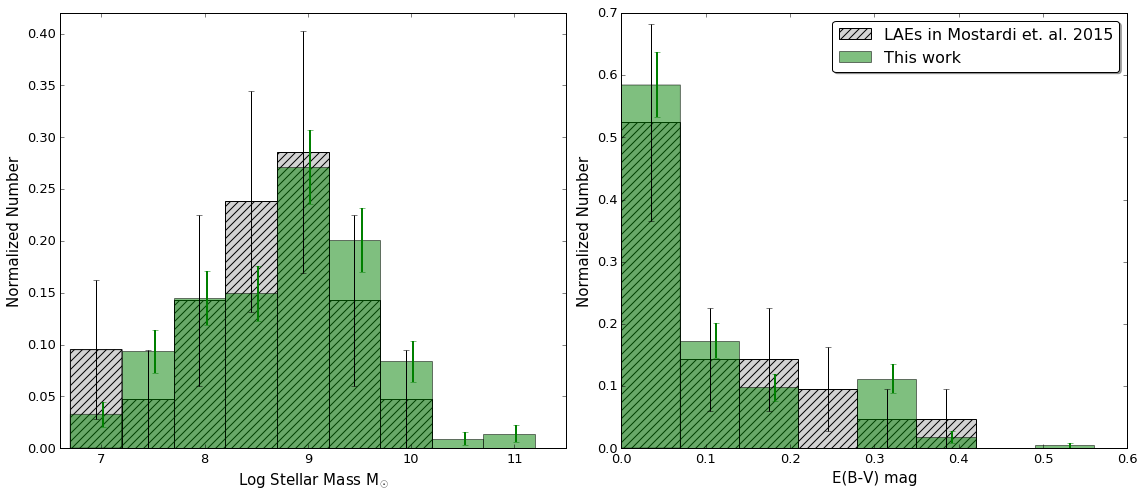

In [90]:
fig=plt.subplots(1,2,dpi=75,tight_layout=True,figsize=(16,7))

#Stellar mass
plt.subplot(1,2,1)
#bin_mos=0.5*0.33*np.arange(30)+6.67
bin_mos=np.arange(6.7,13.7,0.5)
#logmass_mos=np.array([7.25,7.5,7.85,7.85,7.85,7.85,8.25,8.25,8.25,8.25,8.25,8.25,8.5,8.5,8.5,8.5,8.5,8.5,8.85,8.85,8.85,8.85,8.85,9.25,9.25,9.25,9.5,10.25])
weights = np.ones_like(logmass)/float(len(logmass))
weights2 = np.ones_like(mass[good])/float(len(mass[good]))

n, bins, patches=plt.hist(logmass, bins=bin_mos, weights=weights,normed=0, facecolor='lightgray', alpha=1.0,hatch='///',label='LAEs in Mostardi et. al. 2015')
yerror=np.sqrt(n)*np.sqrt(weights[0])
x0=np.arange(6.95,13.45,0.5)
plt.errorbar(x0, n, yerr=yerror, fmt=' ',ecolor='black')

n2, bins2, patches2=plt.hist(mass[good], bins=bin_mos, weights=weights2,normed=0, facecolor='green', alpha=0.5,label='This work')
yerror2=np.sqrt(n2)*np.sqrt(weights2[0])
x02=np.arange(7.02,13.51,0.5)
plt.errorbar(x02, n2, yerr=yerror2, fmt=' ',ecolor='green',elinewidth=2)

plt.xlabel('Log Stellar Mass M$_{\odot}$',fontsize=15)
plt.ylabel('Normalized Number',fontsize=15)
#plt.title(r'$\mathrm{Histogram\ of\ Mostardi\ et.\ al.\ 2015\ LAEs }$',fontsize=15)
plt.axis([6.6, 11.5, 0, 0.42])
plt.grid(False)
plt.tick_params(axis='both', which='major', labelsize=13)
#plt.legend(loc='upper right',bbox_to_anchor=[1,1],ncol=1,shadow=True,fancybox=True,fontsize=16)

plt.subplot(1,2,2)
# E(B-V) plot
bin_mos=np.arange(0,0.6,0.07)
#logebv_mos=np.array([0.05,  0.05,  0.05,  0.05,  0.05,  0.05,  0.05,  0.05,  0.05,0.05,  0.05,  0.05,  0.05,0.1,  0.1,  0.1,  0.1,  0.1,0.17,  0.17,  0.17,  0.17,0.25,  0.25,  0.25,0.33,0.4,0.4])
weights = np.ones_like(ebvmos)/float(len(ebvmos))
weights2 = np.ones_like(ebv[good])/float(len(ebv[good]))
n, bins, patches=plt.hist(ebvmos, bins=bin_mos, weights=weights,normed=0, facecolor='lightgray', alpha=1.0,hatch='///',label='LAEs in Mostardi et. al. 2015')
yerror=np.sqrt(n)*np.sqrt(weights[0])
x0=np.arange(0.035,0.566,0.07)
plt.errorbar(x0, n, yerr=yerror, fmt=' ',ecolor='black')

n2, bins2, patches2=plt.hist(ebv[good], bins=bin_mos, weights=weights2,normed=0, facecolor='green', alpha=0.5,label='This work')
yerror2=np.sqrt(n2)*np.sqrt(weights2[0])
x02=np.arange(0.042,0.573,0.07)
plt.errorbar(x02, n2, yerr=yerror2, fmt=' ',ecolor='green',elinewidth=2)

plt.xlabel('E(B-V) mag',fontsize=15)
plt.ylabel('Normalized Number',fontsize=15)
#plt.title(r'$\mathrm{Histogram\ of\ Mostardi\ et.\ al.\ 2015\ LAEs }$',fontsize=15)
plt.axis([0, 0.6, 0, 0.7])
plt.tick_params(axis='both', which='major', labelsize=13)
plt.grid(False)
plt.legend(loc='upper right',bbox_to_anchor=[1,1],ncol=1,shadow=True,fancybox=True,fontsize=16)
plt.savefig('mostardi_mass_dust.png')
